In [25]:
import numpy as np
import pandas as pd
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report

from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import make_pipeline
import plotly.graph_objects as go
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
import re

In [26]:
#Cargar dataset
data = pd.read_csv('Datase_ML.csv', encoding="utf-8")

In [27]:
df = data.drop(columns=['length', 'cleaned_resume'])

C:\Users\pepeh\AppData\Local\Temp\ipykernel_2784\2955146718.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y="Category", data=df, palette='Reds')


<Axes: xlabel='count', ylabel='Category'>

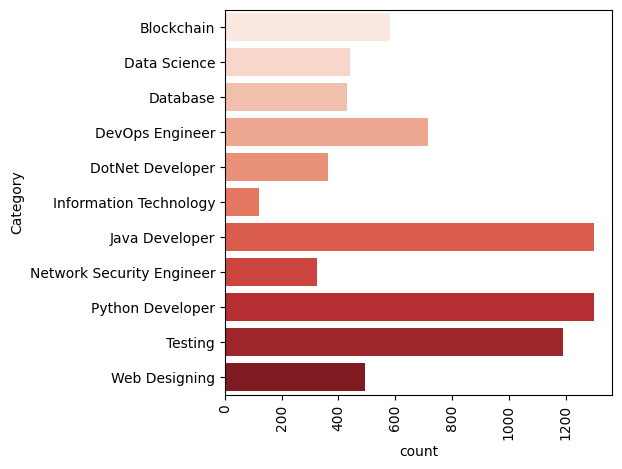

In [28]:
plt.figure(figsize=(5,5))
plt.xticks(rotation=90)
sns.countplot(y="Category", data=df, palette='Reds')

In [29]:
resumeDataSet = df.copy()
resumeDataSet.head()

,Category,Resume,cleaned_Resume
0,Blockchain,Hobbies â¢ Playing Chess â¢ Solving Rubik's ...,hobbies playing chess solving rubik s cube wat...
1,Blockchain,"SOFTWARE SKILLS: Languages: C, C++ & java Oper...",software skills languages c c java operating s...
2,Blockchain,"SKILLS Bitcoin, Ethereum Solidity Hyperledger,...",skills bitcoin ethereum solidity hyperledger b...
3,Blockchain,"SKILLS Bitcoin, Ethereum Solidity Hyperledger,...",skills bitcoin ethereum solidity hyperledger b...
4,Blockchain,Skills Strong CS fundamentals and problem solv...,skills strong cs fundamentals and problem solv...


In [30]:
var_mod = ['Category']
le = LabelEncoder()
for i in var_mod:
    resumeDataSet[i] = le.fit_transform(resumeDataSet[i])

In [31]:
resumeDataSet.head()

,Category,Resume,cleaned_Resume
0,0,Hobbies â¢ Playing Chess â¢ Solving Rubik's ...,hobbies playing chess solving rubik s cube wat...
1,0,"SOFTWARE SKILLS: Languages: C, C++ & java Oper...",software skills languages c c java operating s...
2,0,"SKILLS Bitcoin, Ethereum Solidity Hyperledger,...",skills bitcoin ethereum solidity hyperledger b...
3,0,"SKILLS Bitcoin, Ethereum Solidity Hyperledger,...",skills bitcoin ethereum solidity hyperledger b...
4,0,Skills Strong CS fundamentals and problem solv...,skills strong cs fundamentals and problem solv...


In [32]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

In [33]:
requiredText = resumeDataSet['cleaned_Resume'].values
requiredTarget = resumeDataSet['Category'].values

word_vectorizer = TfidfVectorizer(
    sublinear_tf=True,
    stop_words='english',
    max_features=1500)
word_vectorizer.fit(requiredText)
WordFeatures = word_vectorizer.transform(requiredText)

print ("Feature completed .....")

X_train,X_test,y_train,y_test = train_test_split(WordFeatures,requiredTarget,random_state=0, test_size=0.2)
print(X_train.shape)
print(X_test.shape)

Feature completed .....
(5806, 1500)
(1452, 1500)


In [34]:
# Configuramos el modelo Random Forest con balanceo de clases
rf_model = RandomForestClassifier(class_weight='balanced', n_estimators=200)

In [35]:
# Ahora aplicamos validación cruzada
# Define el número de folds para la validación cruzada
n_folds = 5
# Realizamos validación cruzada
scores = cross_val_score(rf_model, WordFeatures, requiredTarget, cv=n_folds, scoring='accuracy')
# Entrenamos el modelo
rf_model.fit(X_train, y_train)
# Realizamos predicciones
y_pred = rf_model.predict(X_test)

In [36]:
# Evaluamos el rendimiento del modelo
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       127
           1       1.00      1.00      1.00        75
           2       1.00      1.00      1.00        79
           3       1.00      1.00      1.00       150
           4       1.00      1.00      1.00        69
           5       1.00      1.00      1.00        33
           6       1.00      1.00      1.00       258
           7       1.00      1.00      1.00        58
           8       1.00      1.00      1.00       281
           9       1.00      1.00      1.00       222
          10       1.00      1.00      1.00       100

    accuracy                           1.00      1452
   macro avg       1.00      1.00      1.00      1452
weighted avg       1.00      1.00      1.00      1452



In [37]:
# Para una evaluación más detallada, puedes entrenar el modelo en el conjunto de entrenamiento completo y evaluarlo en el conjunto de prueba
# Esto es opcional pero puede proporcionar más información sobre el rendimiento del modelo
rf_model.fit(X_train, y_train)
y_pred = rf_model.predict(X_test)

In [38]:
# Imprimir el reporte de clasificación
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       127
           1       1.00      1.00      1.00        75
           2       1.00      1.00      1.00        79
           3       1.00      1.00      1.00       150
           4       1.00      1.00      1.00        69
           5       1.00      1.00      1.00        33
           6       1.00      1.00      1.00       258
           7       1.00      1.00      1.00        58
           8       1.00      1.00      1.00       281
           9       1.00      1.00      1.00       222
          10       1.00      1.00      1.00       100

    accuracy                           1.00      1452
   macro avg       1.00      1.00      1.00      1452
weighted avg       1.00      1.00      1.00      1452



In [39]:
class JobPredictor:
    def __init__(self) -> None:
        self.le = le
        self.word_vectorizer = word_vectorizer
        self.clf = rf_model #checar

    def predict(self, resume):
        feature = self.word_vectorizer.transform([resume])
        predicted = self.clf.predict(feature)
        resume_position = self.le.inverse_transform(predicted)[0]
        return resume_position

    def predict_proba(self, resume):
        feature = self.word_vectorizer.transform([resume])
        predicted_prob = self.clf.predict_proba(feature)
        return predicted_prob[0]
    
    def cleanResume(self, resumeText):
        resumeText = re.sub('http\S+\s*', ' ', resumeText)  # remove URLs
        resumeText = re.sub('RT|cc', ' ', resumeText)  # remove RT and cc
        resumeText = re.sub('#\S+', '', resumeText)  # remove hashtags
        resumeText = re.sub('@\S+', '  ', resumeText)  # remove mentions
        resumeText = re.sub('[%s]' % re.escape("""!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~"""), ' ', resumeText)  # remove punctuations
        resumeText = re.sub(r'[^\x00-\x7f]',r' ', resumeText) # remove non-ascii characters
        resumeText = re.sub('\s+', ' ', resumeText)  # remove extra whitespace
        resumeText = resumeText.lower()  # convert to lowercase
        return resumeText

<>:19: SyntaxWarning: invalid escape sequence '\S'
<>:21: SyntaxWarning: invalid escape sequence '\S'
<>:22: SyntaxWarning: invalid escape sequence '\S'
<>:23: SyntaxWarning: invalid escape sequence '\]'
<>:25: SyntaxWarning: invalid escape sequence '\s'
<>:19: SyntaxWarning: invalid escape sequence '\S'
<>:21: SyntaxWarning: invalid escape sequence '\S'
<>:22: SyntaxWarning: invalid escape sequence '\S'
<>:23: SyntaxWarning: invalid escape sequence '\]'
<>:25: SyntaxWarning: invalid escape sequence '\s'
C:\Users\pepeh\AppData\Local\Temp\ipykernel_2784\583337680.py:19: SyntaxWarning: invalid escape sequence '\S'
  resumeText = re.sub('http\S+\s*', ' ', resumeText)  # remove URLs
C:\Users\pepeh\AppData\Local\Temp\ipykernel_2784\583337680.py:21: SyntaxWarning: invalid escape sequence '\S'
  resumeText = re.sub('#\S+', '', resumeText)  # remove hashtags
C:\Users\pepeh\AppData\Local\Temp\ipykernel_2784\583337680.py:22: SyntaxWarning: invalid escape sequence '\S'
  resumeText = re.sub('@\S+

# **Validaciones reales**

In [40]:
job_description = """
Skills Required:

Proficiency in statistical analysis, machine learning, and data mining techniques
Strong programming skills in Python or R for data analysis and model development
Experience with data manipulation and transformation using SQL and/or NoSQL databases
Knowledge of data visualization libraries such as Matplotlib, Seaborn, or Plotly
Familiarity with distributed computing frameworks like Apache Spark for big data processing
Understanding of cloud platforms such as AWS, Azure, or Google Cloud for data storage and computing
Ability to communicate complex findings and insights to both technical and non-technical stakeholders
Experience with version control systems like Git for collaborative development
Strong problem-solving skills and attention to detail
Background in mathematics, statistics, computer science, or a related field
Roles & Responsibilities:

Serve as a subject matter expert in statistical analysis and machine learning techniques
Collaborate with cross-functional teams including data engineers, business analysts, and domain experts to identify and solve complex business problems
Design, develop, and deploy machine learning models to extract actionable insights from large datasets
Conduct exploratory data analysis to uncover patterns, trends, and correlations in the data
Evaluate model performance and iterate on algorithms to improve accuracy and efficiency
Create data visualizations and interactive dashboards to communicate findings and drive decision-making
Stay current with emerging technologies and industry trends in data science and machine learning
Mentor and provide guidance to junior data scientists and analysts
Participate in code reviews, team meetings, and knowledge-sharing sessions
Adapt to changing priorities and manage multiple projects simultaneously
"""

In [41]:
resume_position = JobPredictor().predict(job_description)
f'JD uploaded! Position: {resume_position}'

'JD uploaded! Position: Python Developer'

In [42]:
job_description = """
Skills Required:

Proficient in C# and Dot NET framework for application development
Strong understanding of object-oriented programming principles
Experience with ASP Dot NET MVC or ASP Dot NET Core for web development
Familiarity with front-end technologies such as HTML, CSS, and JavaScript
Knowledge of relational databases like SQL Server or MySQL
Experience with version control systems such as Git
Understanding of software development best practices and design patterns
Ability to write clean, maintainable, and efficient code
Strong problem-solving and debugging skills
Excellent communication skills and ability to work in a team environment
Roles & Responsibilities:

Develop and maintain Dot NET applications using C# and related technologies
Collaborate with cross-functional teams to gather requirements and define project scope
Design and implement scalable and secure web applications
Write unit tests and conduct code reviews to ensure code quality
Troubleshoot and debug issues in existing applications
Keep up-to-date with the latest Dot NET technologies and industry trends
Provide technical guidance and mentorship to junior developers
Participate in Agile development processes and meetings
Communicate effectively with stakeholders to understand business requirements
Adapt to changing project requirements and deadlines
"""

In [43]:

resume_position = JobPredictor().predict(job_description)
f'JD uploaded! Position: {resume_position}'

'JD uploaded! Position: Python Developer'

In [44]:
job_description = """
Skills Required:

Proficiency in HTML5, CSS3, and JavaScript for web development
Experience with responsive design techniques and frameworks like Bootstrap or Foundation
Strong understanding of user experience (UX) and user interface (UI) design principles
Knowledge of Adobe Creative Suite (Photoshop, Illustrator, XD, etc.) or other design tools
Familiarity with version control systems such as Git
Understanding of web accessibility standards and best practices
Ability to create visually appealing and intuitive website layouts
Excellent attention to detail and ability to work to tight deadlines
Strong communication skills and ability to collaborate with cross-functional teams
Understanding of SEO principles and techniques for optimizing website performance
Roles & Responsibilities:

Design visually stunning and user-friendly website layouts and interfaces
Collaborate with stakeholders to understand project requirements and objectives
Create wireframes, mockups, and prototypes to demonstrate design concepts
Implement designs using HTML, CSS, and JavaScript while ensuring cross-browser compatibility
Optimize website performance for speed and responsiveness
Conduct usability testing and gather feedback to iterate on designs
Stay updated on the latest design trends, tools, and technologies
Work closely with developers to ensure designs are implemented accurately
Communicate effectively with clients and project teams throughout the design process
Provide guidance and mentorship to junior designers or developers when needed
Contribute to design discussions and brainstorming sessions to generate new ideas
"""

In [45]:
resume_position = JobPredictor().predict(job_description)
f'JD uploaded! Position: {resume_position}'

'JD uploaded! Position: Java Developer'

In [46]:
job_description = """
Name: Maria Lopez

Profile:
Experienced Java Developer with a proven track record of designing, implementing, and maintaining Java-based applications. Possessing a solid understanding of object-oriented programming principles, design patterns, and best practices in software development. Skilled in utilizing Java frameworks such as Spring and Hibernate to build robust and scalable applications. Proficient in database management systems including MySQL and Oracle. Strong problem-solving abilities with a keen attention to detail. Excellent communication skills and ability to work collaboratively in a team environment.

Experience:

Senior Java Developer
ABC Software Solutions
January 2019 - Present
Responsibilities:

Lead the development team in designing and implementing Java-based solutions for clients.
Collaborate with cross-functional teams to gather requirements and define project scopes.
Develop and maintain RESTful APIs using Spring Boot framework.
Optimize application performance and ensure scalability.
Conduct code reviews and mentor junior developers.
Java Developer
XYZ Tech Inc.
June 2016 - December 2018
Responsibilities:

Developed and maintained enterprise-level Java applications for internal and external use.
Participated in all phases of the software development lifecycle, from requirements gathering to deployment.
Integrated third-party APIs and services into existing systems.
Troubleshooted and resolved technical issues in a timely manner.
Assisted in the training of new team members on Java development practices.
Education:
Bachelor of Science in Computer Science
University of Technology
Graduated: May 2016

Skills:

Proficient in Java programming language
Experience with Spring framework (Spring Boot, Spring MVC, Spring Security)
Familiarity with Hibernate ORM framework
Strong knowledge of database management systems (MySQL, Oracle)
Understanding of software development methodologies (Agile, Scrum)
Excellent problem-solving and analytical skills
Effective communication and teamwork abilities
"""

In [47]:

resume_position = JobPredictor().predict(job_description)
f'JD uploaded! Position: {resume_position}'

'JD uploaded! Position: Python Developer'

In [48]:
job_description = """
Resumen Profesional:
Ingeniero de pruebas de software con experiencia en el diseño, ejecución y automatización de pruebas para garantizar la calidad y la funcionalidad de las aplicaciones. Poseo un sólido conocimiento de las metodologías de pruebas y herramientas de automatización, así como habilidades de resolución de problemas y análisis detallado. Mi enfoque meticuloso y orientado a resultados me permite identificar y resolver defectos de manera eficiente, contribuyendo al éxito del proyecto y la satisfacción del cliente.

Experiencia Laboral:

Ingeniero de Pruebas Senior
Empresa XYZ
Fecha de inicio - Fecha de término

Diseñé estrategias de pruebas exhaustivas para aplicaciones web y móviles, cubriendo casos de uso críticos y escenarios de borde.
Desarrollé y mantuve suites de pruebas automatizadas utilizando herramientas como Selenium y Appium, reduciendo el tiempo de ejecución de pruebas en un 50%.
Colaboré con equipos de desarrollo para implementar prácticas de integración continua y entrega continua (CI/CD), mejorando la eficiencia del ciclo de desarrollo.
Analista de Pruebas
Empresa ABC
Fecha de inicio - Fecha de término

Ejecuté pruebas de regresión, funcionales y de rendimiento para aplicaciones empresariales críticas, identificando y documentando defectos para su corrección.
Participé en revisiones de diseño y requisitos para garantizar la testabilidad de los sistemas y la detección temprana de posibles problemas.
Contribuí al desarrollo y mantenimiento de herramientas internas de pruebas y al establecimiento de estándares de calidad del software.
Educación:

Licenciatura en Ingeniería de Software, Universidad XYZ, Año de Graduación
Habilidades Técnicas:

Pruebas manuales y automatizadas
Herramientas de automatización de pruebas (Selenium, Appium, JUnit, TestNG)
Metodologías de desarrollo ágil (Scrum, Kanban)
Gestión de defectos y seguimiento de problemas (JIRA, Bugzilla)
Pruebas de rendimiento (JMeter, LoadRunner)
Análisis de requisitos y diseño de casos de prueba
Integración continua y entrega continua (CI/CD)
Idiomas:

Español (nativo)
Inglés (avanzado)
Certificaciones:

Certificado en Pruebas de Software ISTQB
Certificado en Automatización de Pruebas con Selenium WebDriver
"""

In [49]:

resume_position = JobPredictor().predict(job_description)
f'JD uploaded! Position: {resume_position}'

'JD uploaded! Position: Java Developer'